In [1]:
import pandas
import matplotlib.pyplot
import seaborn
import sklearn.linear_model
import sklearn.preprocessing

In [2]:
df = pandas.read_csv("train.csv")

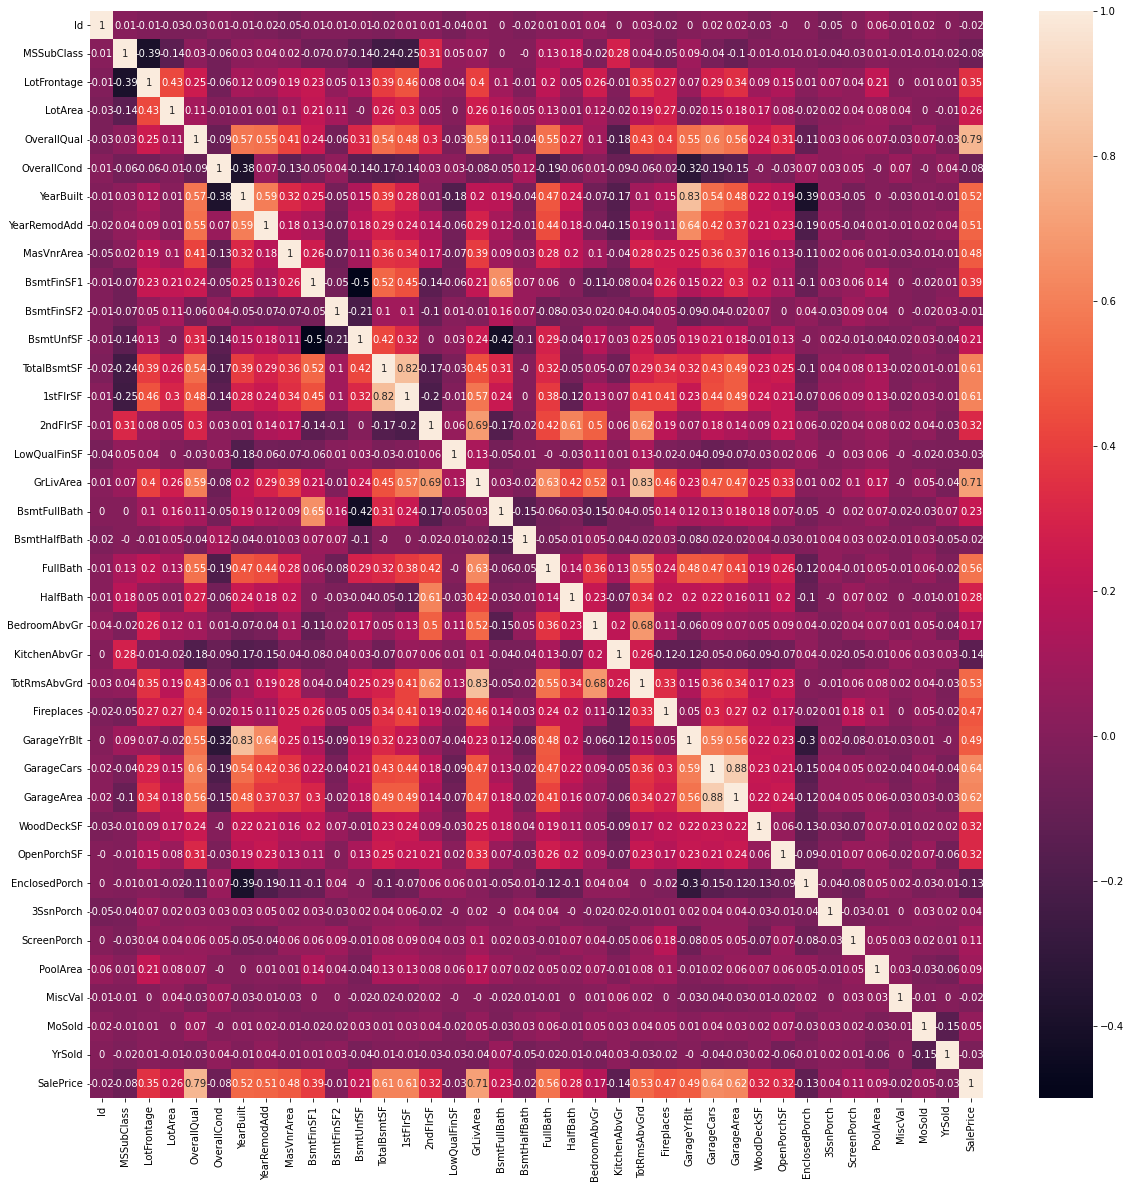

In [3]:
cor = df.corr().round(2)
matplotlib.pyplot.figure(figsize=(20, 20))
seaborn.heatmap(data=cor, annot=True)
matplotlib.pyplot.show()

In [4]:
X = df[['OverallQual', 'GrLivArea', 'GarageCars']]
for Xlabel in X:
    X[Xlabel] /= (max(X[Xlabel]) - min(X[Xlabel]))
Y = df['SalePrice']

C:\Users\Soumi\AppData\Local\Temp\ipykernel_21344\2961447710.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[Xlabel] /= (max(X[Xlabel]) - min(X[Xlabel]))


In [5]:
X.isna().sum()

OverallQual    0
GrLivArea      0
GarageCars     0
dtype: int64

In [6]:
Y.isna().sum()

0

In [7]:
X

,OverallQual,GrLivArea,GarageCars
0,0.777778,0.322155,0.50
1,0.666667,0.237754,0.50
2,0.777778,0.336473,0.50
3,0.777778,0.323474,0.75
4,0.888889,0.414092,0.75
...,...,...,...
1455,0.666667,0.310286,0.50
1456,0.666667,0.390543,0.50
1457,0.777778,0.440844,0.25
1458,0.555556,0.203090,0.25


OverallQual


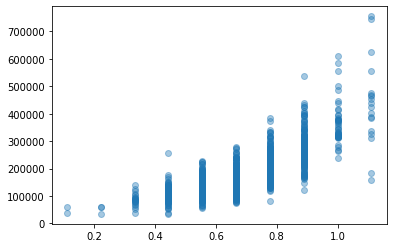

GrLivArea


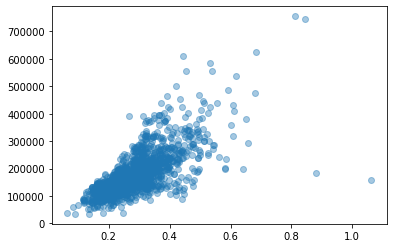

GarageCars


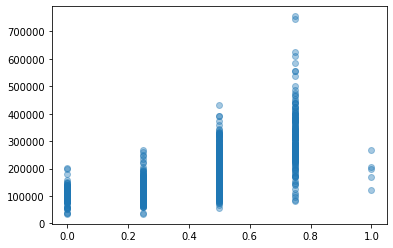

In [8]:
for Xlabel in X:
    print(Xlabel)
    matplotlib.pyplot.scatter(X[Xlabel], Y, alpha=0.4)
    matplotlib.pyplot.show()

In [9]:
poly = sklearn.preprocessing.PolynomialFeatures()
poly = poly.fit_transform(X)

sgdr = sklearn.linear_model.LinearRegression()
sgdr.fit(poly, Y)
sgdr.score(poly, Y)

0.8019935799487597

In [10]:
Ypred = sgdr.predict(poly)

OverallQual


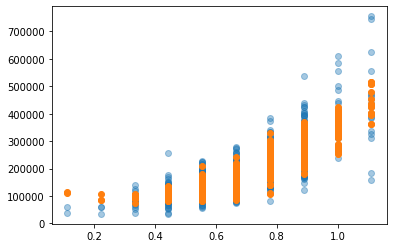

GrLivArea


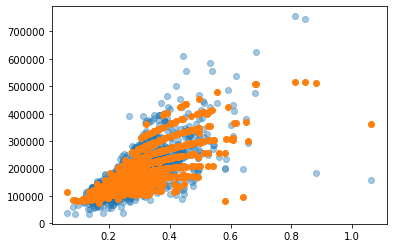

GarageCars


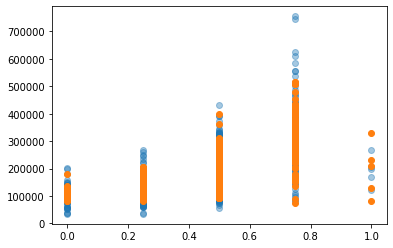

In [11]:
for Xlabel in X:
    print(Xlabel)
    matplotlib.pyplot.scatter(X[Xlabel], Y, alpha=0.4)
    matplotlib.pyplot.scatter(X[Xlabel], Ypred)
    matplotlib.pyplot.show()